<a href="https://colab.research.google.com/github/Tusharkp05/Capstone-Proj-Walmart/blob/main/Capstone_Proj_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing necessary libraries:-
!pip install pandas matplotlib seaborn scikit-learn statsmodels --quiet

In [ ]:
# Importing libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Uploading the ZIP file:-
from google.colab import files
uploaded = files.upload()

Saving Walmart DataSet.zip to Walmart DataSet (1).zip


In [ ]:
# Viewing the uploaded file:-
print(uploaded)

{'Walmart DataSet (1).zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x007~\x8fU\x91\xc1\xa3\xeb\x07\xe8\x01\x00\xd4\x8c\x05\x00\x13\x00\x00\x00Walmart DataSet.csv\\\xbd\xcb\xae\xb6;\x8f\x1c6\x0f\x90;Y\xbd\xa0\xb3\xa8q\x02#\x99\x19p\x82\x0c\x8dF\xf2#0\xd2\xb6\x03\xc7\x1e\xf8\xeeS\xc5\xa2\x1equ\x03\xbdw\xf7\xfe\xbez\xf5P\x07\x8ab\xf1\xf0\xef\xfe\xeb\x7f\xfe/\xff\xf8\xf9\x9f\xff\xf9\xbf\xfe\xe3\xe7\xff\xf8\xc7?\xfe\x9f\x7f\xf9\xef\xff\xfe\xdf\xfd\xf3\xbf\xfc\xe3\xff\xfb\xf9_\xfe\xf3\xbf\xfc\x87\xff\xeb\x9f\xff\xfb\xbf\xff7\xff\xf2\xcf\xff\xf7\xcf\xff\xf6\x8f\xff\xf8\xff\xfe\xe3\xbf\xfc\xf3\x7f\xfdo\xf8\xab\xff\xe6\xbf\xfd\xe3_\xfe\xfd\xbf\xfd/\xff\xe1\xff\xfc\xc7\xcf\xff\xf4o\xff\xd7\x9f\xff\xfd?\xe1\xcf\xfe\xe5?\xff\xf7\xff\xf8\x8f\xff\xf4_\xff\xc7\xff\xa1\xfe\x94\xf9O\xa5\xfdS+\xb5\xfc\xd45\xfa:\xe5\xf7\xfc\x94\x9f\xd1~{\xfdi\xbfs\xb7\x9fV\xebo9\xabOk?\xf6[\xcb"\xae\xb6\x8c\xabg\xee\xdf1~\xeaO\xb7\xdf\xe9\xc0a\x0el\xa3\xd5u,\x01O\x02\xd6z\x16\xfedc\xc4~~O\'\xb0\x0e\x01\xed\xd4\xd1\xce\x03\xb6\x

In [ ]:
# Loading the dataset:-
df = pd.read_csv("Walmart DataSet.zip")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Checking for missing values:-
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Dataset Info:-
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [ ]:
# Summary Stats:-
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.23

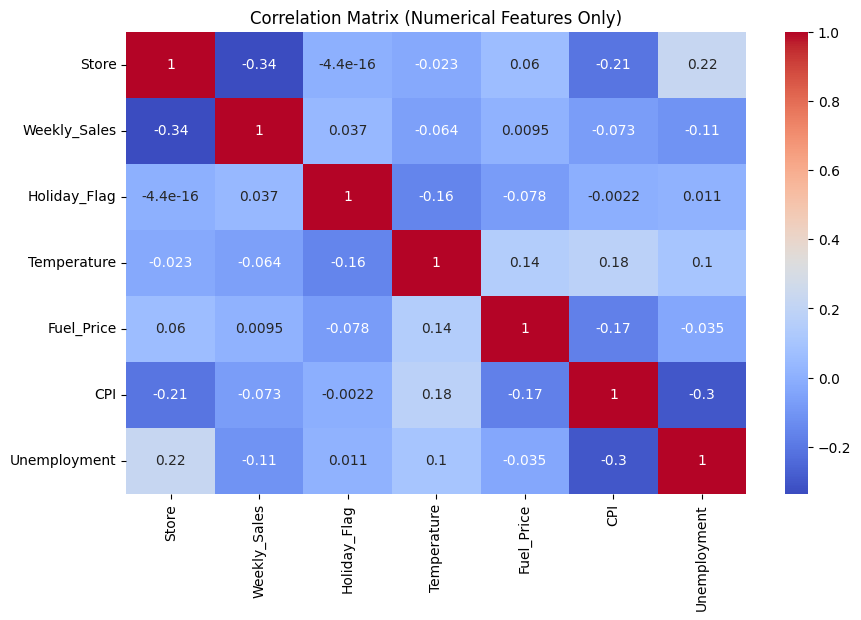

In [ ]:
# Correlation Matrix:-
plt.figure(figsize=(10, 6))

# Only including numeric columns for correlation:-
numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

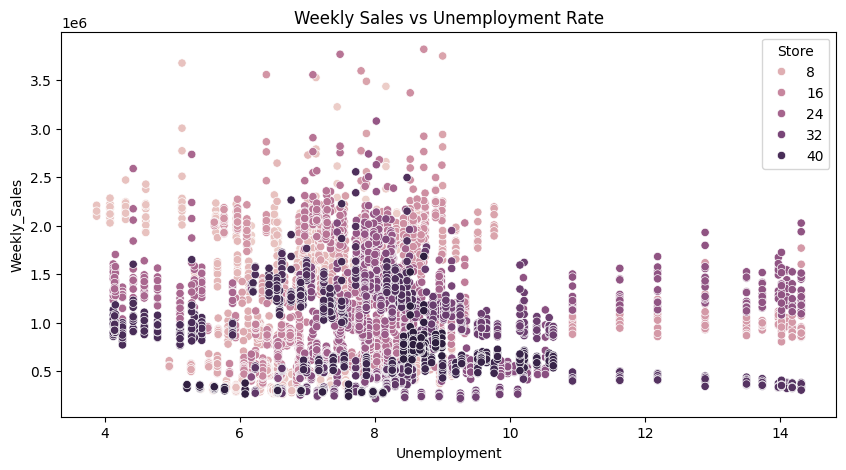

In [ ]:
# Weekly Sales vs Unemployment Rate:-
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', hue='Store', data=df)
plt.title("Weekly Sales vs Unemployment Rate")
plt.show()

In [ ]:
# Correlation of Weekly Sales with Unemployment Rate by Store:-
unemp_corr = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1]
unemp_corr.name = 'Correlation'  # Give the series a name

# Printing sorted correlation values:-
print("\nCorrelation of Weekly Sales with Unemployment Rate by Store:")
print(unemp_corr.sort_values())


Correlation of Weekly Sales with Unemployment Rate by Store:
Store              
38     Weekly_Sales   -0.785290
44     Weekly_Sales   -0.780076
39     Weekly_Sales   -0.384681
42     Weekly_Sales   -0.356355
41     Weekly_Sales   -0.350630
4      Weekly_Sales   -0.337015
17     Weekly_Sales   -0.263600
3      Weekly_Sales   -0.230413
37     Weekly_Sales   -0.221287
5      Weekly_Sales   -0.207043
43     Weekly_Sales   -0.201954
9      Weekly_Sales   -0.191534
13     Weekly_Sales   -0.171633
7      Weekly_Sales   -0.165382
40     Weekly_Sales   -0.112528
32     Weekly_Sales   -0.099455
1      Weekly_Sales   -0.097955
20     Weekly_Sales   -0.095341
23     Weekly_Sales   -0.077169
16     Weekly_Sales   -0.070864
26     Weekly_Sales   -0.066899
31     Weekly_Sales   -0.064738
8      Weekly_Sales   -0.052580
11     Weekly_Sales   -0.020339
27     Weekly_Sales   -0.014275
24     Weekly_Sales   -0.012261
12     Weekly_Sales   -0.009286
25     Weekly_Sales   -0.004958
45     Weekly_Sales   

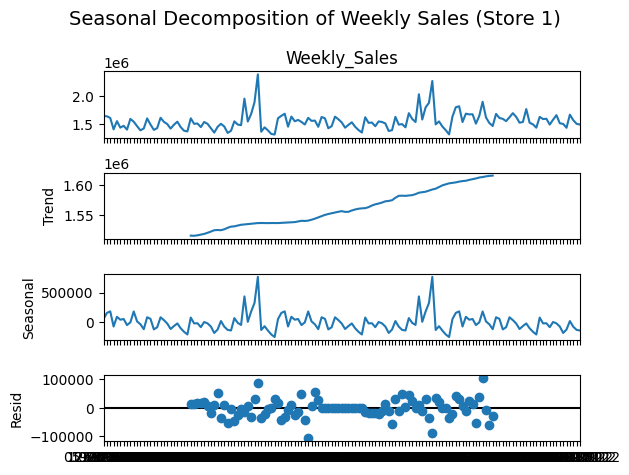

In [ ]:
# Seasonal Trends for Store 1:-
df_store1 = df[df['Store'] == 1].set_index('Date')
res = seasonal_decompose(df_store1['Weekly_Sales'], model='additive', period=52)
res.plot()
plt.suptitle("Seasonal Decomposition of Weekly Sales (Store 1)", fontsize=14)
plt.tight_layout()
plt.show()

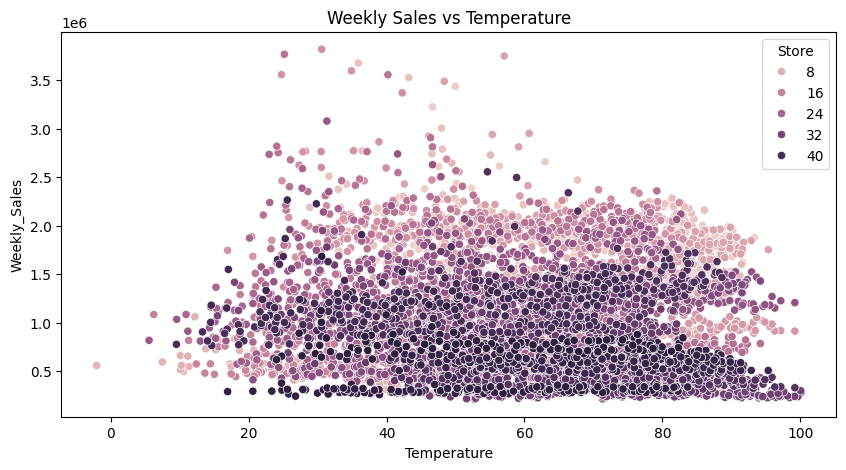

In [ ]:
# Weekly Sales vs Temperature:-
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Store', data=df)
plt.title("Weekly Sales vs Temperature")
plt.show()

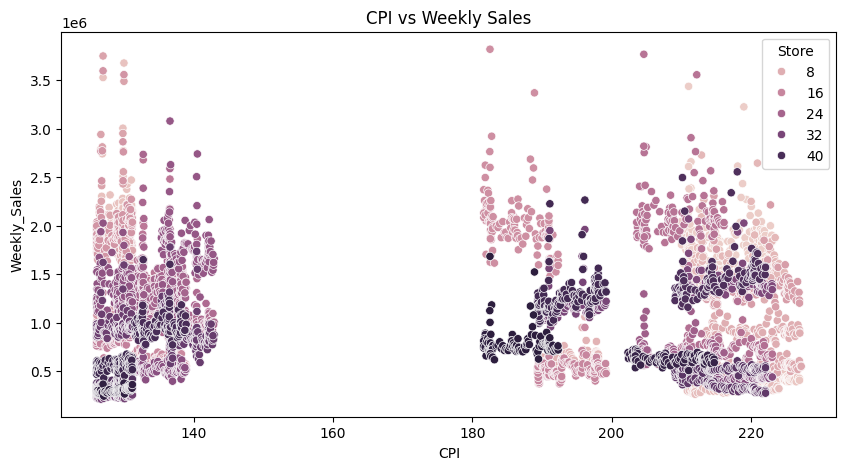

In [ ]:
# CPI vs Weekly Sales:-
plt.figure(figsize=(10, 5))
sns.scatterplot(x='CPI', y='Weekly_Sales', hue='Store', data=df)
plt.title("CPI vs Weekly Sales")
plt.show()

In [ ]:
# Top Performing Stores (by avg weekly sales):-
avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
print("\nTop Performing Stores:")
print(avg_sales.head())


Top Performing Stores:
Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64


In [ ]:
# Worst Store & Difference:-
worst = avg_sales.idxmin()
best = avg_sales.idxmax()
diff = avg_sales[best] - avg_sales[worst]
print(f"\nWorst Store: {worst} | Avg Sales: {avg_sales[worst]:.2f}")
print(f"Difference between best and worst store: {diff:.2f}")


Worst Store: 33 | Avg Sales: 259861.69
Difference between best and worst store: 1847815.18


In [ ]:
# Forecasting next 12 weeks using Linear Regression:-
print("\nForecasting next 12 weeks (per store)...")
forecast_results = {}
for store in df['Store'].unique():
    store_df = df[df['Store'] == store].sort_values('Date')
    store_df['Week'] = range(len(store_df))

    X = store_df[['Week']]
    y = store_df['Weekly_Sales']

    model = LinearRegression()
    model.fit(X, y)

    future_weeks = pd.DataFrame({'Week': list(range(len(store_df), len(store_df) + 12))})
    forecast = model.predict(future_weeks)
    forecast_results[store] = forecast

# Showing forecast for Store 1:-
print("\nNext 12-week forecast for Store 1:")
print(forecast_results[1])


Forecasting next 12 weeks (per store)...

Next 12-week forecast for Store 1:
[1482645.22919827 1481636.62963779 1480628.03007732 1479619.43051684
 1478610.83095637 1477602.23139589 1476593.63183542 1475585.03227494
 1474576.43271447 1473567.83315399 1472559.23359352 1471550.63403304]
